In [224]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from scipy import stats

import numpy as np

In [246]:
# Data loading

df = pd.read_csv("curated_gene_disease_associations_curated_gene_disease_associations.csv")

In [247]:
# Get a look on the data

df.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.857,0.172,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,0.3,NaN,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.857,0.172,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.3,NaN,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.564,0.724,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.4,0.848485,1998.0,2016.0,3,0,CTD_human
3,2,A2M,0.564,0.724,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human
4,2,A2M,0.564,0.724,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human


In [248]:
# Descriptive statistics

df.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,8.174600e+04,81620.000000,81598.000000,81746.000000,22862.000000,73123.000000,73123.000000,81746.000000,81746.000000
mean,6.214032e+05,0.577307,0.569338,0.345747,0.956704,2006.373179,2010.641194,1.377853,0.982751
std,7.676491e+06,0.136227,0.226062,0.112264,0.142197,7.937566,5.954987,2.594623,14.596577
min,1.000000e+00,0.251000,0.034000,0.010000,0.000000,1916.000000,1952.000000,0.000000,0.000000
25%,2.638000e+03,0.479000,0.414000,0.300000,1.000000,2003.000000,2007.000000,1.000000,0.000000
50%,5.428000e+03,0.572000,0.621000,0.300000,1.000000,2008.000000,2011.000000,1.000000,0.000000
75%,1.028000e+04,0.663000,0.759000,0.320000,1.000000,2012.000000,2015.000000,1.000000,0.000000
max,1.095801e+08,1.000000,0.966000,1.000000,1.000000,2018.000000,2018.000000,124.000000,2343.000000


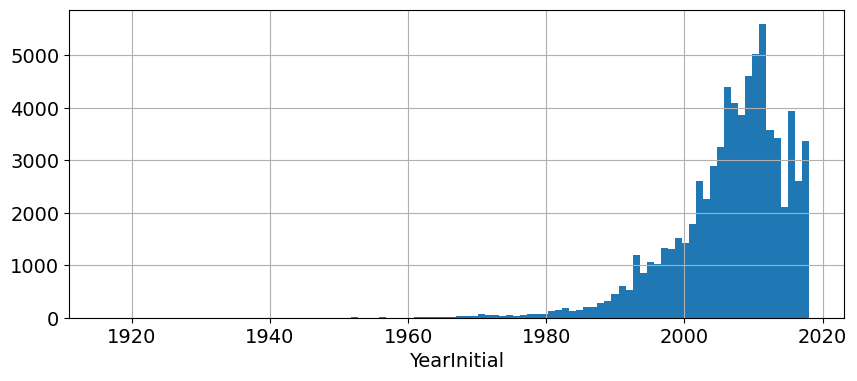

In [229]:
df["YearInitial"].hist(bins=100, figsize=(10,4))

plt.xlabel("YearInitial")

plt.show()

As describe in the class we have the Year initial variable values are left skewed that can cause some problem of outlier if we decide to build a model on this kind of data.

In [249]:
df.groupby(by="YearInitial").count().head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearFinal,NofPmids,NofSnps,source
YearInitial,,,,,,,,,,,,,,,
1916.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1924.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
1933.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1948.0,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
1949.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In constraint of `table` in R we haven't or I don't know a function that can allow me to do the same operation. Then I groupby `YearInitial` and get the number of observation for each year. Assume that we have `YearInitial` as index that we can perform the same operation as the output of table(`YearInitial`).

In [231]:
# All columns have the same values then randomly we can choose one. Here I go for geneId 

YearInitial_freq = df.groupby(by="YearInitial").count()["geneId"]

YearInitial_freq.head()

YearInitial
1916.0    1
1924.0    1
1933.0    1
1948.0    2
1949.0    3
Name: geneId, dtype: int64

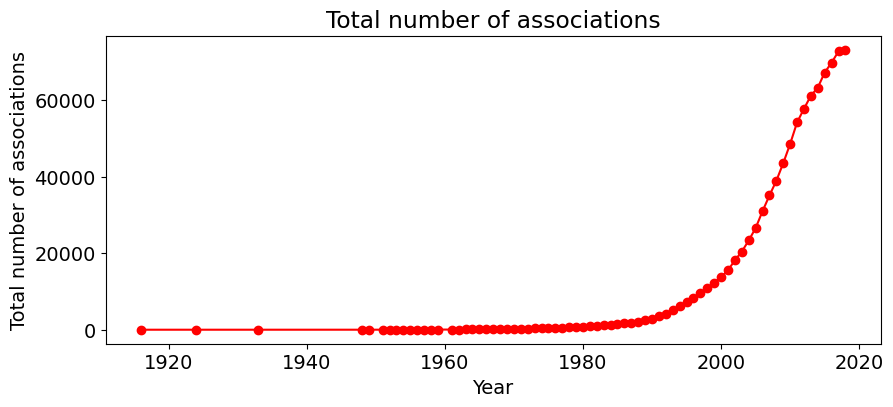

In [232]:
x = YearInitial_freq.index # The years
y = np.cumsum(YearInitial_freq.values) # cumsum of number observation for each year

# Plotting we matplotlib

plt.figure(figsize=(10,4))
plt.plot(x,y, "ro-")
plt.title("Total number of associations")
plt.xlabel("Year")
plt.ylabel("Total number of associations")
plt.show()

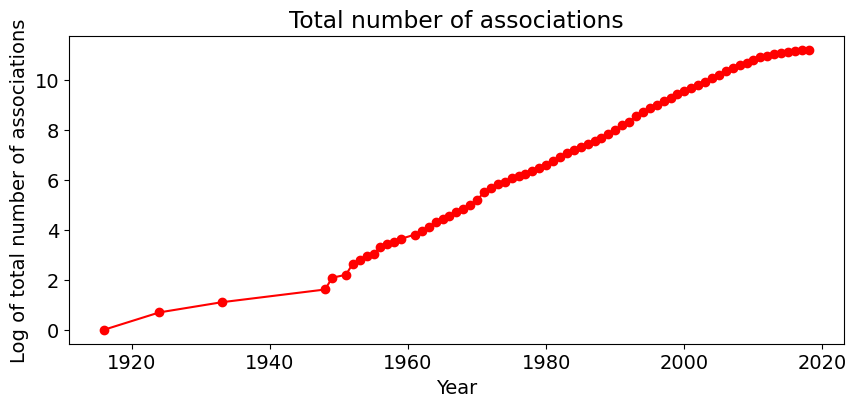

In [250]:
# Applying log transformation on the y values to approximation linear distribution. As above curve is near of exponential distribution

plt.figure(figsize=(10,4))
plt.plot(x,np.log(y), "ro-")
plt.title("Total number of associations")
plt.xlabel("Year")
plt.ylabel("Log of total number of associations")
plt.show()

In [251]:
# Log transformation of y is quite better for linear regression than log2 in contraint of R. Aftere checking the ouput I decide 
# to continue with log-transformation
 
logy = np.log(y)#/ np.log(2)

# As our values are two times linear it will be better for us to model them differently we will go for the second one after 1945

logy_after_1945 = logy[x>1945] # it work because the index is YearInitial 
x_after_1945 = x[x>1945]  # it work because the index is YearInitial 

In [252]:
# the lm function can be understood by looking at the manual through lm

x_after_1945 = sm.add_constant(x_after_1945)
model = sm.OLS(logy_after_1945,x_after_1945).fit()

In [253]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 geneId   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.580e+04
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.78e-81
Time:                        08:20:44   Log-Likelihood:                 19.131
No. Observations:                  69   AIC:                            -34.26
Df Residuals:                      67   BIC:                            -29.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -269.4480      2.200   -122.464      0.0

In [254]:
model.params

const   -269.448031
x1         0.139407
dtype: float64

The estimated params are differents from R lm output the result remains the same as well as $R^2$

In [258]:
fitted_values = model.fittedvalues

values = -269.448031 + 0.139407 * x

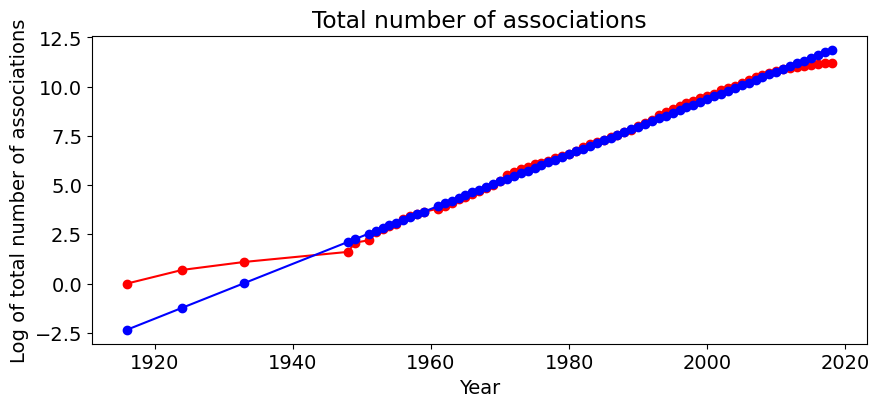

In [259]:
plt.figure(figsize=(10,4))
plt.plot(x,np.log(y), "ro-")
plt.plot(x,values, "bo-")

plt.title("Total number of associations")
plt.xlabel("Year")
plt.ylabel("Log of total number of associations")
plt.show()